In [2]:
#export
import os
import time
import random
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import scipy 
import seaborn as sns

from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
#import warnings
#warnings.filterwarnings('ignore')


data_path = './input/commonlitreadabilityprize/'

trn_df = pd.read_csv(data_path + 'train.csv')
test_df = pd.read_csv(data_path + 'test.csv')
sub_df = pd.read_csv(data_path + 'sample_submission.csv')

from IPython.display import display
display(trn_df.sample(5))
display(test_df)
display(sub_df)

,id,url_legal,license,excerpt,target,standard_error
88,b0eab5ef8,NaN,NaN,"Time is a very odd sort of thing, dear readers...",-1.240081,0.468613
1875,dbb82f833,NaN,NaN,The reader may think that the collections made...,-1.291894,0.451136
2581,fa8918595,NaN,NaN,"The sun was up and the breeze was blowing, and...",-0.405086,0.460527
598,36a340cb8,https://www.commonlit.org/texts/a-sense-of-won...,CC BY-NC-SA 2.0,When the atomic bombs were dropped on Hiroshim...,-1.067678,0.505502
103,ad1ad157a,NaN,NaN,Many many years back the Captain's wife had be...,-1.007073,0.462427


,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...
5,12537fe78,NaN,NaN,"To explain transitivity, let us look first at ..."
6,965e592c0,https://www.africanstorybook.org/#,CC BY 4.0,Milka and John are playing in the garden. Her ...


,id,target
0,c0f722661,0.0
1,f0953f0a5,0.0
2,0df072751,0.0
3,04caf4e0c,0.0
4,0e63f8bea,0.0
5,12537fe78,0.0
6,965e592c0,0.0


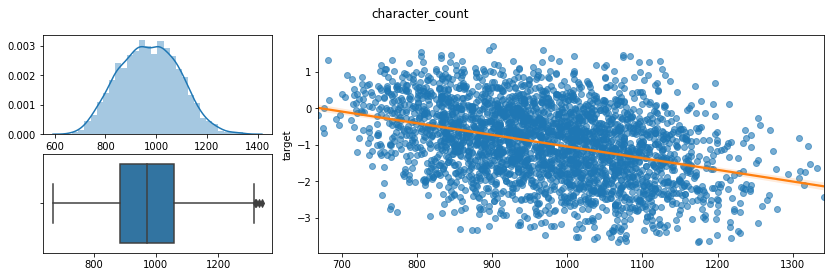

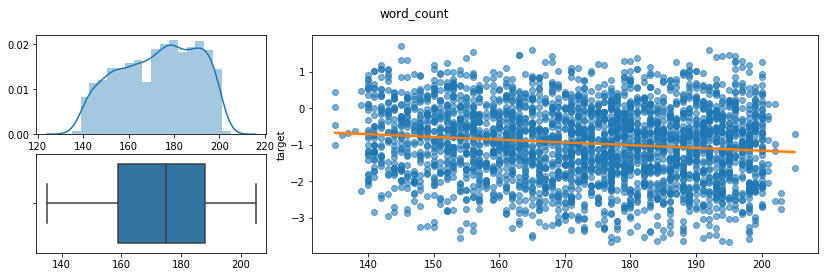

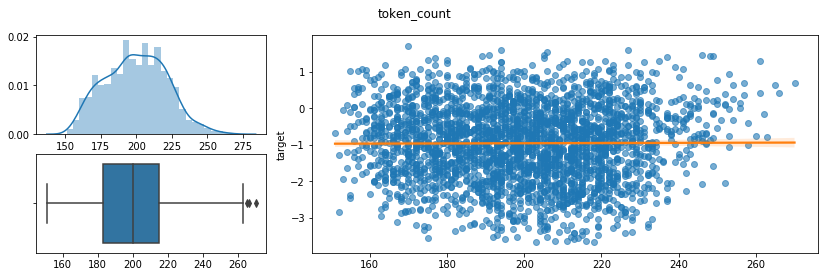

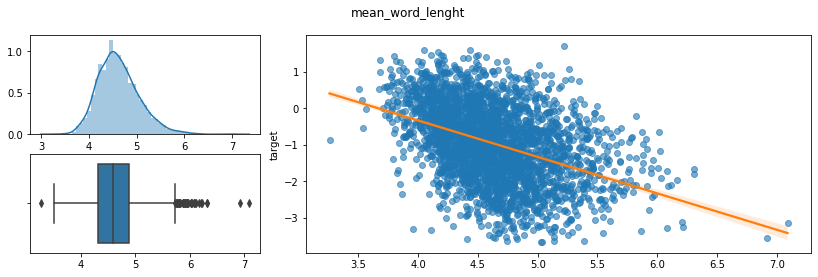

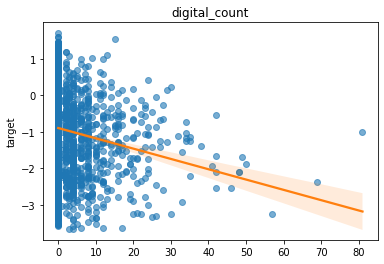

In [3]:
trn_df['character_count'] = trn_df.excerpt.apply(lambda x: len(x))
trn_df['word_count'] = trn_df.excerpt.str.split().apply(lambda x: len(x))
trn_df['token_count'] =trn_df.excerpt.apply(lambda x: len(word_tokenize(x)))
trn_df['mean_word_lenght'] = trn_df.excerpt.str.split().apply(lambda x: np.mean([len(i) for i in x]))
trn_df['digital_count'] = trn_df.excerpt.apply(lambda x: sum(c.isdigit() for c in x))

features = ['character_count', 'word_count', 'token_count', 'mean_word_lenght']

for feature in features:
    plt.figure(figsize=(14, 4))
    plt.suptitle(feature)
    plt.subplot(2, 3, 1)
    sns.distplot(trn_df[feature])
    plt.subplot(2, 3, 4)
    sns.boxplot(trn_df[feature])
    plt.xlabel('')
    plt.subplot2grid((2, 3), (0, 1), rowspan=2, colspan=3)
    sns.regplot(feature,
                'target',
                trn_df,
                scatter_kws={'alpha': 0.6},
                line_kws={'color': 'C1'})
    plt.xlabel('')
    plt.show()

plt.title('digital_count')
sns.regplot('digital_count',
            'target',
            trn_df,
            scatter_kws={'alpha': 0.6},
            line_kws={'color': 'C1'})
plt.xlabel('')
plt.show()

In [7]:
from sklearn.linear_model import Ridge

In [9]:
r = Ridge().fit(trn_df.mean_word_lenght.values[:, None], trn_df.target)

In [14]:
def rmse(preds, ys): return ((preds - ys) ** 2).mean() ** 0.5
rmse(r.predict(trn_df.mean_word_lenght.values[:, None]), trn_df.target)

0.9400384872728489

In [6]:
trn_df.mean_word_lenght.values

array([4.54748603, 4.55029586, 4.47590361, ..., 4.        , 4.76666667,
       5.06849315])